# Task 1. Packing Circles into a Square

In [1]:
from matplotlib import pyplot as plt

In [2]:
def draw_square():
    square = plt.Polygon([(1, 1), (5, 1), (5, 5), (1, 5)], closed = True)
    return square

In [3]:
def draw_circle(x, y, r = 0.5):
    circle = plt.Circle((x, y), radius=r, fc='y') # a built-in function
    return circle

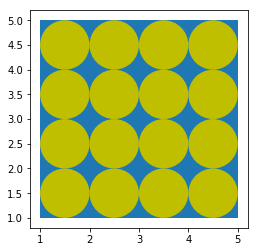

In [4]:
if __name__ == '__main__':
    ax = plt.gca()
    s = draw_square()
    ax.add_patch(s)
    y = 1.5
    while y < 5:
        x = 1.5
        while x < 5:
            c = draw_circle(x, y)
            ax.add_patch(c)
            x += 1.0
        y += 1.0
    plt.axis('scaled') # Set equal scaling (i.e., make circles circular) by changing dimensions of the plot box.
    plt.show()

# Task 2. Drawing the Sierpinski Triangle

In [5]:
import matplotlib.pyplot as plt
import random

In [6]:
def transformation_1(p):
    x = p[0]
    y = p[1]
    x_1 = 0.5 * x
    y_1 = 0.5 * y
    return x_1, y_1

In [7]:
def transformation_2(p):
    x = p[0]
    y = p[1]
    x_1 = 0.5 * x + 0.5
    y_1 = 0.5 * y + 0.5
    return x_1, y_1

In [8]:
def transformation_3(p):
    x = p[0]
    y = p[1]
    x_1 = 0.5 * x + 1
    y_1 = 0.5 * y
    return x_1, y_1

In [9]:
def get_index(probability):
    r = random.random()
    c_probability = 0
    sum_probability = []
    for p in probability:
        c_probability += p
        sum_probability.append(c_probability)
    for item, sp in enumerate(sum_probability):
        if r <= sp:
            return item
    return len(probability)-1

In [10]:
def transform(p):
    transformations = [transformation_1, transformation_2, transformation_3]
    probability = [1/3, 1/3, 1/3]
    tindex = get_index(probability)
    t = transformations[tindex]
    x, y = t(p)
    return x, y

In [11]:
def draw_sierpinski(n):
    x = [0]
    y = [0]
    
    x_1, y_1 = 0, 0
    for i in range(n):
        x_1, y_1 = transform((x_1, y_1))
        x.append(x_1)
        y.append(y_1)
    return x, y

Enter the number of points in the Triangle: 7692


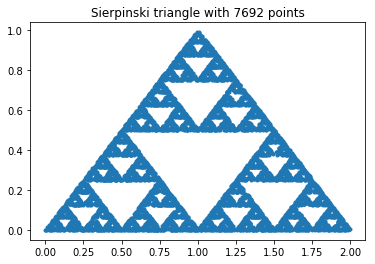

In [12]:
if __name__ == '__main__':
    n = int(input('Enter the number of points in the Triangle: '))
    x, y = draw_sierpinski(n)
    plt.plot(x, y, '.')
    plt.title('Sierpinski triangle with {0} points'.format(n))
    plt.show()

# Task 3. Exploring Henon's Function

In [13]:
def transform(p):
    x = p[0]
    y = p[1]
    x_1 = y + 1 - 1.4 * x ** 2
    y_1 = 0.3 * x
    return x_1, y_1

In [14]:
def build_trajectory(p, n):
    x = [p[0]]
    y = [p[1]]
    for i in range(n):
        p = transform(p)
        x.append(p[0])
        y.append(p[1])
    return x, y

Enter the number of points in the Henon's Function: 1000


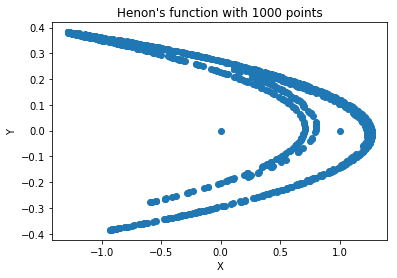

In [15]:
if __name__ == '__main__':
    n = int(input('Enter the number of points in the Henon\'s Function: '))
    p = (0, 0)
    x, y = build_trajectory(p, n)
    plt.plot(x, y, 'o')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Henon\'s function with {0} points'.format(n))
    plt.show()

# Task 4. Drawing the Mandelbrot Set

In [16]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [17]:
x_0 = -2.5
x_1 = 1
y_0 = -1
y_1 = 1

In [18]:
def initialize_image(x_p, y_p):
    image = []
    for i in range(y_p):
        x_colors = []
        for j in range(x_p):
            x_colors.append(0)
        image.append(x_colors)
    return image

In [19]:
def draw_mandelbrot(n=400, m=1000):
    im = initialize_image(n, n)
    
    dx = (x_1 - x_0) / (n - 1)
    dy = (y_1 - y_0) / (n - 1)
    x_coords = [x_0 + i*dx for i in range(n)]
    y_coords = [y_0 + i*dy for i in range(n)]
    
    for i, x in enumerate(x_coords):
        for k, y in enumerate(y_coords):
            z_1 = complex(0, 0)
            iteration = 0
            c = complex(x, y)
            while ((abs(z_1) < 2)  and (iteration < m)):
                z_1 = z_1 ** 2 + c
                iteration += 1
            im[k][i] = iteration
    return im  

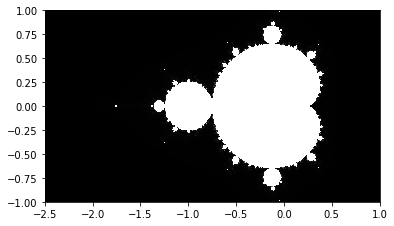

In [20]:
if __name__ == '__main__':
    image = draw_mandelbrot()
    plt.imshow(image, origin='lower', extent=(x_0, x_1, y_0, y_1),
               cmap=cm.Greys_r, interpolation='nearest')
    plt.show()